# Exercise: Bayesian optimization with SilicoColorMixer

In this exercise you will use a Bayesian optimizers in a way similar to the way you used the SciPy optimizers in exercise 1 and 2. This exercise uses the `SilicoColorMixer`. Next exercise you will move to the LEGO robot, so make sure you do proper coding and experiment with parameters in this exercise to make the next one easier. 

You can [code your own Bayesian optimizer](https://machinelearningmastery.com/what-is-bayesian-optimization/), but unless you have something really specific in mind, you will often be better of using one of the many Bayesian optimizers readily available. Many of these in some way or another depend on [scikit-learn](https://scikit-learn.org/stable/index.html), a very popular Python machine learning library. 

In this exercise we will use a very advanced optimizer, [Dragonfly](https://dragonfly-opt.readthedocs.io/en/master/). If you are up for it you can read [the paper](https://arxiv.org/abs/1903.06694), but be aware that it is *really* difficult to grasp. Dragonfly is *not* user friendly, barely documented (which is sadly quite common for machine learning software), and it is really computationally demanding, but it is able to reduce the number of function calls needed quite efficienctly. Since our function calls are rather slow when they involve physical experiments, this is a feature we really value. We could also have used the [Phoenics](https://pubs.acs.org/doi/full/10.1021/acscentsci.8b00307) optimizer.

Is this exercise you will learn to run the optimizer, load and save data, and apply advanced constraints. Dragonfly can do a lot more, but this will suffice.

Start by getting Dragonfly if you don't already have it.

In [35]:
try:
    from dragonfly import minimize_function
    from argparse import Namespace
    import numpy as np
    from IPython import display
    import matplotlib.pyplot as plt
    from plot_pie_charts import make_piechart_plot
except:
    !pip3 install numpy --user --upgrade
    !pip3 install dragonfly-opt -v --user --upgrade
    from dragonfly import minimize_function
    from argparse import Namespace
    import numpy as np
    from IPython import display
    import matplotlib.pyplot as plt
    from plot_pie_charts import make_piechart_plot

Try running the simple example modified from the Dragonfly documentation below:

In [2]:
def simple_function(x):
    val = x ** 4 - x**2 + 0.1 * x
    print(x, val) # To keep extra track on progress. Displays input and output
    return val

In [3]:
simple_function_bounds = [[-5., 5.]]
max_func_calls = 20

In [ ]:
min_val, min_pt, history = minimize_function(simple_function, simple_function_bounds, max_func_calls)
print(min_val, min_pt)

Optimisation with bo(ei-ucb-ttei-add_ucb) using capital 20.0 (return_value)
[2.20162991] [18.86808718]
[-1.38796748] [1.6459735]
[0.71859854] [-0.17787171]
[3.5058733] [139.13174873]
[-3.86131751] [207.00542256]
Capital spent on initialisation: 5.0000(0.2500).
Legend: <iteration_number> (<num_successful_queries>, <fraction_of_capital_spent>):: curr_max=<current_maximum_value>, acqs=<num_times_each_acquisition_was_used>
[0.81161095] [-0.1436493]
[0.85522193] [-0.11092974]
[-0.55411607] [-0.26817983]
[-0.4541426] [-0.20912256]
[-0.96881874] [-0.15450336]
[0.03319277] [0.00221873]
[-0.72933778] [-0.32191402]
#013 (011, 0.550):: curr_max=0.26818, acqs=[ei:0, ucb:4, ttei:2, add_ucb:0], 
[1.46710547] [2.62713125]
[-0.8575364] [-0.28035523]
[-1.21242057] [0.5695874]
[0.28516806] [-0.04619094]


Note that it is not deterministic and thus might arrive at different points if not fully converged.

Now, let us make it 2D. Our function should still only take one input, but it can be a list rather than a scalar.

In [13]:
def simple_function2D(input_list):
    x, y = input_list[0], input_list[1]
    val = x ** 4 - x**2 + 0.1 * x + y**2
    print(input_list, val) # To keep extra track on progress. Displays input and output
    return val

Add a dimension to the bounds list.

In [14]:
simple_function_bounds = [[-5., 5.], [-1., 1.]]
max_func_calls = 20

In [ ]:
min_val, min_pt, history = minimize_function(simple_function2D, simple_function_bounds, max_func_calls)
print(min_val, min_pt)

There you go. Conversion is slower with more parameters but this is really all it takes to start **using** the optimizer as a black box tool. We won't open the black box too much due to fear of what might come out if we do ;) but you will learn a few tricks to user it smarter.

To us, the magic number is 9 since we have 9 cuvettes to mix in when using the LEGO robot. Let us set some parameters to make the optimizer rebuild models for every 9 iterations and display a report line for every 9 as well. Let us also use 9 points as `init_capital`. That is the number of random points sampled before models are build.

Setting these parameters is really a matter or learning the Dragonfly convention and list of available parameters. Rather than having you spend time on this they will be spoon fed to you. But don't fall asleep. You will be put to the test shortly.

In [4]:
options = Namespace(init_capital=9, build_new_model_every=9, report_results_every=9)

In [13]:
min_val, min_pt, history = minimize_function(simple_function2D, simple_function_bounds, max_func_calls, options=options)
print(min_val, min_pt)

Optimisation with bo(ei-ucb-ttei-add_ucb) using capital 20.0 (return_value)
[2.82170679 0.06702092] 55.71854238045906
[-3.25866433  0.89824094] 102.62297091702385
[-4.66286447 -0.5968241 ] 450.8754352152414
[-1.07176557 -0.95042286] 0.9669146678204469
[-0.3411414   0.42493324] 0.04362037152645537
[1.36403542 0.71669126] 2.2512622284877497
[-2.46291026 -0.12387386] 30.498596288386892
[ 4.68826641 -0.40710055] 461.768166285323
[2.12952735 0.27296084] 16.31777137306351
Capital spent on initialisation: 9.0000(0.4500).
Legend: <iteration_number> (<num_successful_queries>, <fraction_of_capital_spent>):: curr_max=<current_maximum_value>, acqs=<num_times_each_acquisition_was_used>
#010 (009, 0.450):: curr_max=-0.04362, acqs=[ei:0, ucb:0, ttei:0, add_ucb:0], 
[-4.99974597  0.57572525] 599.707021679674


KeyboardInterrupt: 

Another very useful feature is to be able to save progress and/or load in progress. `progress_load_from_and_save_to`, `progress_load_from` and `progress_save_to` will help you with this. You can use `progress_save_every` to save every *n* steps. Try is out.

In [59]:
# The two top line finds your home directory
from pathlib import Path
home = str(Path.home())

options = Namespace(init_capital=9, build_new_model_every=9, report_results_every=9,
                    progress_load_from_and_save_to=home + '/47332/data/simple2D_savefile', progress_save_every=3)

In [60]:
max_func_calls = 5

min_val, min_pt, history = minimize_function(simple_function2D, simple_function_bounds, max_func_calls, options=options)
print(min_val, min_pt)

Optimisation with bo(ei-ucb-ttei-add_ucb) using capital 5.0 (return_value)
[ 3.92494622 -0.71547562] 222.81947180715358
[2.94730472 0.74266826] 67.61678976730315
[2.18441182 0.34197114] 18.332421931610853
[-4.92181445 -0.02932305] 562.0990709998149
[-1.66623558 -0.91308972] 5.5988376889649665
[-2.65730426 -0.11318642] 42.547291475522066
[-3.16609833  0.97322232] 91.09053012620724
[ 0.60392387 -0.51209061] 0.09092876774913822
[0.35815396 0.29246095] 0.009528828569774994
Capital spent on initialisation: 9.0000(1.8000).
Legend: <iteration_number> (<num_successful_queries>, <fraction_of_capital_spent>):: curr_max=<current_maximum_value>, acqs=<num_times_each_acquisition_was_used>
#010 (009, 1.800):: curr_max=-0.00953, acqs=[ei:0, ucb:0, ttei:0, add_ucb:0], 
Saved 9 data to /zhome/0a/b/51514/47332/data/simple2D_savefile_cd_test2.
0.009528828569774994 [0.35815396 0.29246095]


In [61]:
max_func_calls = 5

min_val, min_pt, history = minimize_function(simple_function2D, simple_function_bounds, max_func_calls, options=options)
print(min_val, min_pt)

Optimisation with bo(ei-ucb-ttei-add_ucb) using capital 5.0 (return_value)
Loaded 9 data from files ['/zhome/0a/b/51514/47332/data/simple2D_savefile_cd_test2'].
Legend: <iteration_number> (<num_successful_queries>, <fraction_of_capital_spent>):: curr_max=<current_maximum_value>, acqs=<num_times_each_acquisition_was_used>
[-1.64101001 -0.07925621] 4.401051692817689
[-0.62490474  0.99998306] 0.6994646065351023
[1.26403495 0.99998306] 2.081500137524252
Saved 11 data to /zhome/0a/b/51514/47332/data/simple2D_savefile_cd_test2.
[1.33516232 0.99998306] 2.52869500600269
[-0.18594726 -0.99999435] 0.948013124922223
[-1.00746837 -0.99998306] 0.9144365925694221
Saved 14 data to /zhome/0a/b/51514/47332/data/simple2D_savefile_cd_test2.
#006 (006, 1.200):: curr_max=-0.00953, acqs=[ei:2, ucb:2, ttei:2, add_ucb:0], 
Saved 15 data to /zhome/0a/b/51514/47332/data/simple2D_savefile_cd_test2.
0.009528828569774994 [0.35815396 0.29246095]


# Moving to the color mixing

You have learned what you **need** to know about Dragonfly. Now it is your time to get to work. Reusing your code from the first in silico exercise, figure out how to mix the below target color using the Dragonfly optimizer.

You will use this code on the robot tomorrow, so be thorough and make sure to include the break after every 9 function calls. Plotting progress as you go will be very helpful in knowing when you feel satisfied with the optimization.

In [25]:
target = (164., 176., 84.)

In [ ]:
# Teacher
# recipe for target 
# [0.02, 0.12, 0.32, 0.54]

In [ ]:
# Cell for you to work in

In [ ]:
# Cell for you to work in

In [ ]:
# Cell for you to work in

In [ ]:
# Cell for you to work in. Add more as needed.

In [18]:
# Teacher
def root_sum_sqr_err(input1, input2):
    """The sum of squared difference between input colors"""
    dif = np.asarray(input1)- np.asarray(input2)
    return (sum(dif**2)**(0.5))

In [26]:
# Teacher
from silico_color_mixer import SilicoColorMixer
mixer_opt2 = SilicoColorMixer(target=target)

In [37]:
# TEACHER
data_opt1=[]
data_pie0=[]
func_calls=[0]

def find_color2(color_list, func_calls=func_calls):
    color, target = mixer_opt2.run_cuvette(color_list, read_target=True)
    score = root_sum_sqr_err(color, target)
    data_opt1.append(color)
    data_pie0.append([score, list(color_list)])
    
    func_calls[0] += 1
    if func_calls[0] % 9 == 0:
        display.clear_output(wait=True)
        plt.axis('off')
        plt.imshow(np.array([data_opt1], dtype=np.uint8))
        make_piechart_plot(data_pie0)
        input('Have cuvettes other than #5 emptied. Then press Enter')
        # When LEGO set the next cuvette to 1 here
    return score

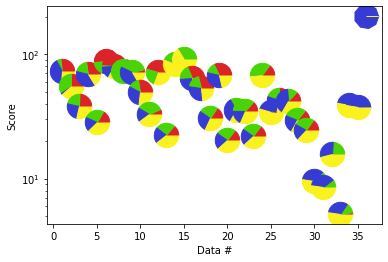

Have cuvettes other than #5 emptied. Then press Enter
#037 (035, 0.972):: curr_max=-5.19615, acqs=[ei:6, ucb:6, ttei:6, add_ucb:8], 
Saved 36 data to /zhome/0a/b/51514/47332/data/Dragonfly_teacher_test.
#038 (037, 1.028):: curr_max=-5.19615, acqs=[ei:6, ucb:7, ttei:7, add_ucb:8], 
Saved 37 data to /zhome/0a/b/51514/47332/data/Dragonfly_teacher_test.
5.196152422706632 [0.04458162 0.25171468 0.6138546  0.99977138]


In [38]:
# Teacher
func_calls=[0]

max_func_calls = 36
function_bounds = [[0., 1.], [0., 1.] ,[0., 1.], [0., 1.]]

# The two top line finds your home directory
from pathlib import Path
home = str(Path.home())

options = Namespace(init_capital=9, build_new_model_every=9, report_results_every=9,
                    progress_load_from_and_save_to=home + '/47332/data/Dragonfly_teacher_test', progress_save_every=3)

min_val, min_pt, history = minimize_function(find_color2, function_bounds, max_func_calls, options=options)
print(min_val, min_pt)

# Reusing old data

One thing is being able to reuse data generate with Dragonfly. Another thing is using data generated by other means. I have written a small helper function for you to help you with this. It is on purpose semi-manual to allow you to see what is going on. Let us go back to the 2D case to try it out.

In [1]:
from make_savefile import make_dragonfly_save_file

Let us get some data. Normally you will not generate it but pull it out of a file.

In [68]:
simple_function2D([2., 0.2])
simple_function2D([1., -0.2])
simple_function2D([-5., -1.])
simple_function2D([5., 1.])
simple_function2D([0., 0.])

[2.0, 0.2] 12.239999999999998
[1.0, -0.2] 0.14
[-5.0, -1.0] 600.5
[5.0, 1.0] 601.5
[0.0, 0.0] 0.0


0.0

Let us make that date into a list with the below format.

In [2]:
data_list = [[2.0, 0.2, 12.239999999999998],
             [1.0, -0.2, 0.14],
             [-5.0, -1.0, 600.5],
             [5.0, 1.0, 601.5],
             [0.0, 0.0, 0.0]]

Dragonfly works in values relative to the bounds when saving data so we have to supply those as well. It also means that you should not use old savefiles when changing bounds, but you can always generate new savefiles from the raw results following the producere we examine here.

In [3]:
constraints = [[-5., 5.], [-1., 1.]]

Lets make the file with data. 

In [8]:
# The two top line finds your home directory
from pathlib import Path
home = str(Path.home())

filename = 'manual_data_simple_function2D'
file_path = home + '/47332/data/'
full_path = file_path + filename

make_dragonfly_save_file(data_list, full_path, constraints,)

[[ 2.000e-01  1.000e-01  1.224e+01]
 [ 1.000e-01 -1.000e-01  1.400e-01]
 [-5.000e-01 -5.000e-01  6.005e+02]
 [ 5.000e-01  5.000e-01  6.015e+02]
 [ 0.000e+00  0.000e+00  0.000e+00]]
[0.2 0.1]
[ 0.1 -0.1]
[-0.5 -0.5]
[0.5 0.5]
[0. 0.]


Verify that you have written the file by looking at files in your data folder.

In [11]:
!ls ~/47332/data/

manual_data_simple_function2D	 simple2D_savefile_cd_test
manual_data_simple_function2D_2  simple2D_savefile_cd_test2
simple2D_savefile


Next, try using the file by loading it in.

In [15]:
# The two top line finds your home directory
from pathlib import Path
home = str(Path.home())

options = Namespace(init_capital=9, build_new_model_every=9, report_results_every=9,
                    progress_load_from_and_save_to=home + '/47332/data/manual_data_simple_function2D', progress_save_every=3)

In [16]:
max_func_calls = 5

min_val, min_pt, history = minimize_function(simple_function2D, simple_function_bounds, max_func_calls, options=options)
print(min_val, min_pt)

Optimisation with bo(ei-ucb-ttei-add_ucb) using capital 5.0 (return_value)
Loaded 5 data from files ['/zhome/0a/b/51514/47332/data/manual_data_simple_function2D'].
Legend: <iteration_number> (<num_successful_queries>, <fraction_of_capital_spent>):: curr_max=<current_maximum_value>, acqs=<num_times_each_acquisition_was_used>
[-4.19092618  0.99998306] 291.5062682560651
[-4.78737997  0.97942387] 502.8424080596435
[-3.30623719 -0.99999993] 109.2294008609755
Saved 7 data to /zhome/0a/b/51514/47332/data/manual_data_simple_function2D.
[-4.99999059 -0.70095834] 599.986733438125
[-2.27404359  0.77183356] 21.93912583862063
[-3.14128944 -0.34567901] 87.30915578598443
Saved 10 data to /zhome/0a/b/51514/47332/data/manual_data_simple_function2D.
#006 (006, 1.200):: curr_max=-0.00000, acqs=[ei:1, ucb:2, ttei:1, add_ucb:2], 
Saved 11 data to /zhome/0a/b/51514/47332/data/manual_data_simple_function2D.
0.0 [-5. -1.]


When you do this trick (or load in data into Dragonfly in general), the initialization face will be skipped. You should thus make sure that the data you load in is sufficiently diverse.

If you want practice, you can try this out with the SilicoColorMixer in the cells below. You can also build one from the lego robot data you already have gather. It that case, see the beginning of the "exercise_dragonfly_lego" notebook.

In [ ]:
# Cell for you to work in.

In [ ]:
# Cell for you to work in.

In [ ]:
# Cell for you to work in.

In [ ]:
# Cell for you to work in. Add more as needed.

This concludes todays notebook.

# JUNK AND SAVE FILE WRITER DEVELOPMENT BELOW!

Dragonfly also allows use of more advanced constraints than simple box constraints. Once turning to the color mixing we know that only the ratios between the different colors matter and not the absolute values of input amount. We can force the sum of inputs to be 1 effectively reducing the dimensionalty of the problem from 4 to 3.

The syntax is complicated so here is an example. The `dim` entry specifies how many dimensions you function input is. For the color mixing it is 4.

In [23]:
from dragonfly import load_config
import numpy as np

In [32]:
domain_vars = [{'name': 'x', 'type': 'float', 'min': 0., 'max': 1., 'dim': 2}]
domain_constraints = [{'name': 'quadrant', 'constraint': 'np.linalg.norm(x, ord=1) >= 1.0'}]

config_params = {'domain': domain_vars, 'domain_constraints': domain_constraints}
config = load_config(config_params)

In [33]:
min_val, min_pt, history = minimize_function(simple_function2D,
                                             config.domain,  # Notice this
                                             max_func_calls,
                                             config=config,  # Notive this
                                             options=options,)
print(min_val, min_pt)

Optimisation with bo(ei-ucb-ttei) using capital 20.0 (return_value)


KeyboardInterrupt: 

In [ ]:

max_num_evals = 30 # Optimisation budget (max number of evaluations)
# Optimise
opt_val, opt_pt, history = maximise_function(objective, config.domain,
                                           max_num_evals, config=config)

In [7]:
from numpy import array

In [8]:
init_points = {'points': [array([1.0, 0.0])]}

#[Namespace(point=[2.0, -0.5])]
               #Namespace(point=[2.0, -0.5]),
              # Namespace(point=[3.0, 0.5]),
              

In [11]:
options = Namespace(build_new_model_every=9, report_results_every=9,
                    progress_load_from_and_save_to='simple2D_savefileX', progress_save_every=3,
                    get_initial_qinfos=init_points, 
                    init_capital=3)

In [12]:
min_val, min_pt, history = minimize_function(simple_function2D, simple_function_bounds, max_func_calls, options=options)
print(min_val, min_pt)

Optimisation with bo(ei-ucb-ttei-add_ucb) using capital 20.0 (return_value)


TypeError: 'dict' object is not callable

In [119]:
options = Namespace(progress_load_from_and_save_to='tester', init_capital=10)#, get_initial_qinfos=init_points)


In [11]:
options = Namespace(init_capital=9, build_new_model_every=9, report_results_every=9)#, get_initial_qinfos=init_points)

#progress_load_from	None
#progress_load_from_and_save_to	None
#progress_report_on_each_save	TRUE
#progress_save_every	5
#progress_save_to	None
#rand_exp_sampling_replace	FALSE
#report_model_on_each_build	0
#report_results_every	13


In [120]:
simple_function_bounds = [[-1., 1.], [-1., 1.]]
max_func_calls = 100

In [121]:
min_val, min_pt, history = minimize_function(simple_function2D, simple_function_bounds, max_func_calls, options=options)
print(min_val, min_pt)

Optimisation with bo(ei-ucb-ttei-add_ucb) using capital 100.0 (return_value)
Loaded 2 data from files ['tester'].
Legend: <iteration_number> (<num_successful_queries>, <fraction_of_capital_spent>):: curr_max=<current_maximum_value>, acqs=<num_times_each_acquisition_was_used>
[-0.99999812 -0.99999812] 0.8999926614831937
[-0.5733882 -0.7480567] 0.2815683364659341
[-0.57379465 -0.74084235] 0.2706268018479054
[-0.58025256 -0.72895392] 0.2500177269487942
[-0.68282274 -0.88797439] 0.47135552272439013
Saved 6 data to /zhome/0a/b/51514/47332_exercises/teacher_notebooks/tester.
[-0.58392183 -0.7493099 ] 0.27836536263429623
[-0.80821013 -0.99994919] 0.6925487266939976
[-0.99999979 -0.73962679] 0.4470473887257735
[-0.70368677 -0.67899541] 0.14068937070799575
[-0.6862775  -0.68600654] 0.15281956475797565
Saved 11 data to /zhome/0a/b/51514/47332_exercises/teacher_notebooks/tester.
[-0.27195493 -0.99999812] 0.9043112649170995
[-0.69504987  0.99999435] 0.6807695243656251
[-0.6862775  -0.66569572] 0.1

KeyboardInterrupt: 

In [ ]:
simple_function2D([-0.775, -1.])

In [97]:
from numpy import array

In [109]:
input_data = [[1.,2.,3.],[4.,5.,6.]]
constraints = [[0., 5.], [0., 10.]]

In [110]:
input_data0 = array(input_data.copy())

In [111]:
for dims in range(len(constraints)):
    scale = constraints[dims][1]-constraints[dims][0]
    #print(input_data0[:, dims])
    input_data0[:,dims] = input_data0[:,dims] / scale
print(input_data0)

[[0.2 0.2 3. ]
 [0.8 0.5 6. ]]


In [54]:
points_list = []
for data in input_data0:
    print(data[:-1]) 
    
    points_list.append(array(data[:-1]))

[0.2 0.2]
[0.8 0.5]


In [55]:
print(points_list)

[array([0.2, 0.2]), array([0.8, 0.5])]


In [60]:
true_vals = -input_data0[:, -1]

In [61]:
print(true_vals)

[-3. -6.]


In [117]:

output = {}
input_data = [[1., 2., 3.], [4., 5., 6.]]
constraints = [[0., 5.], [0., 10.]]

input_data0 = array(input_data.copy())
for dims in range(len(constraints)):
    scale = constraints[dims][1] - constraints[dims][0]
    input_data0[:,dims] = input_data0[:,dims] / scale

#print(input_data0)
points_list = []
for data in input_data0:
    #print(data[:-1])
    points_list.append(array(data[:-1]))

output['points'] = points_list
true_vals = -input_data0[:, -1]
output['true_vals'] = true_vals
output['vals'] = true_vals
print(output)

{'points': [array([0.2, 0.2]), array([0.8, 0.5])], 'true_vals': array([-3., -6.]), 'vals': array([-3., -6.])}


In [118]:
import pickle

with open('tester', 'wb') as handle:
    pickle.dump(output, handle, protocol=pickle.HIGHEST_PROTOCOL)